<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Комментарий ревьюера</b>


Привет, Артем! Давай знакомиться! Меня зовут Дмитрий Махортов, и я буду проверять твой проект. Сразу предлагаю общение на «ты» 🙂, но если тебе это не комфортно, то дай знать, и мы перейдем на «вы». 


Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе погрузиться в увлекательный мир работы с данными и вырасти в крепкого профи. Это отдаленная цель. А ближайшая - сделать твою работу еще лучше )).
   
    
Все ключевые этапы в работе выполнены, и я вижу что с проектом ты справшяешься. Есть моменты, которые нужно доработать, но я уверен, у тебя все получится.
        
Расскажу как обычно проходит проверка:    
Бывают моменты, которые требуют пристального внимания. Комментарии по ним выделены <span style='background-color:#F7B3A4'> красным цветом </span> и обозначены значком 🛑. После их доработки проект будет принят.  🙂
 
<span style='background-color:#B7EBA7'> Зеленым цветом </span> и значком ✅ отмечены удачные и элегантные решения, на которые можно опираться в будущих проектах. Или советы «со звездочкой», которые помогут тебе в будущем.

<span style='background-color:#F9EDA6'>Жёлтым цветом </span> и значком ⚠️ выделено то, что в следующий раз можно сделать по-другому. Ты можешь учесть эти комментарии при выполнении будущих заданий или доработать проект сейчас (однако это не обязательно).

Давай работать над проектом в диалоге: **если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом**. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения. Пожалуйста, **не перемещай, не изменяй и не удаляй мои комментарии**. Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>образец комментария студента</b></font>
   
Можешь использовать этот комментарий. Просто удали этот текст и вместо него напиши свой 🙂

</div>

# Прекод

# Сборный проект-4

Вам поручено разработать демонстрационную версию поиска изображений по запросу.

Для демонстрационной версии нужно обучить модель, которая получит векторное представление изображения, векторное представление текста, а на выходе выдаст число от 0 до 1 — покажет, насколько текст и картинка подходят друг другу.

### Описание данных

Данные лежат в папке `/datasets/image_search/` или доступны по [ссылке](https://code.s3.yandex.net/datasets/dsplus_integrated_project_4.zip).

В файле `train_dataset.csv` находится информация, необходимая для обучения: имя файла изображения, идентификатор описания и текст описания. Для одной картинки может быть доступно до 5 описаний. Идентификатор описания имеет формат `<имя файла изображения>#<порядковый номер описания>`.

В папке `train_images` содержатся изображения для тренировки модели.

В файле `CrowdAnnotations.tsv` — данные по соответствию изображения и описания, полученные с помощью краудсорсинга. Номера колонок и соответствующий тип данных:

1. Имя файла изображения.
2. Идентификатор описания.
3. Доля людей, подтвердивших, что описание соответствует изображению.
4. Количество человек, подтвердивших, что описание соответствует изображению.
5. Количество человек, подтвердивших, что описание не соответствует изображению.

В файле `ExpertAnnotations.tsv` содержатся данные по соответствию изображения и описания, полученные в результате опроса экспертов. Номера колонок и соответствующий тип данных:

1. Имя файла изображения.
2. Идентификатор описания.

3, 4, 5 — оценки трёх экспертов.

Эксперты ставят оценки по шкале от 1 до 4, где 1 — изображение и запрос совершенно не соответствуют друг другу, 2 — запрос содержит элементы описания изображения, но в целом запрос тексту не соответствует, 3 — запрос и текст соответствуют с точностью до некоторых деталей, 4 — запрос и текст соответствуют полностью.

В файле `test_queries.csv` находится информация, необходимая для тестирования: идентификатор запроса, текст запроса и релевантное изображение. Для одной картинки может быть доступно до 5 описаний. Идентификатор описания имеет формат `<имя файла изображения>#<порядковый номер описания>`.

В папке `test_images` содержатся изображения для тестирования модели.

## 1. Исследовательский анализ данных

Наш датасет содержит экспертные и краудсорсинговые оценки соответствия текста и изображения.

В файле с экспертными мнениями для каждой пары изображение-текст имеются оценки от трёх специалистов. Для решения задачи вы должны эти оценки агрегировать — превратить в одну. Существует несколько способов агрегации оценок, самый простой — голосование большинства: за какую оценку проголосовала большая часть экспертов (в нашем случае 2 или 3), та оценка и ставится как итоговая. Поскольку число экспертов меньше числа классов, может случиться, что каждый эксперт поставит разные оценки, например: 1, 4, 2. В таком случае данную пару изображение-текст можно исключить из датасета.

Вы можете воспользоваться другим методом агрегации оценок или придумать свой.

В файле с краудсорсинговыми оценками информация расположена в таком порядке:

1. Доля исполнителей, подтвердивших, что текст **соответствует** картинке.
2. Количество исполнителей, подтвердивших, что текст **соответствует** картинке.
3. Количество исполнителей, подтвердивших, что текст **не соответствует** картинке.

После анализа экспертных и краудсорсинговых оценок выберите либо одну из них, либо объедините их в одну по какому-то критерию: например, оценка эксперта принимается с коэффициентом 0.6, а крауда — с коэффициентом 0.4.

Ваша модель должна возвращать на выходе вероятность соответствия изображения тексту, поэтому целевая переменная должна иметь значения от 0 до 1.


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 Да, это хорошая практика - дать описание контекста и проблемы, которую мы решаем. </div>

In [1]:
!pip install -q tensorflow keras-nlp catboost

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Лично меня очень утомляют простыни логов после установки библиотек. Я их все равно никто не читает. Можно добавить флаг -q и соединить все установки в одну строку. Будет гораздо аккуратноее.
    
    !pip install -q transformers catboost optuna keras-tuner
    
    
    
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента</b></font>
   
Исправил ошибку в соответствии с коментарием

</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Но это относится к библиотекам, которые действительно нужны в этом проекте. Но так ли необходимо апгрейдить pandas до свежей версии?  Я вижу установку spacy и pymystem3, которые ты не используешь в этом проекте... 
    
Пожалуйста убери все лишнее.

</div>

In [70]:
#Подключаем библиотеки
import pandas as pd
import os
import matplotlib.pyplot as plt
from PIL import Image
from pathlib import Path
import numpy as np
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
os.environ["KERAS_BACKEND"] = "tensorflow"
import keras_nlp
from tqdm import tqdm
tqdm.pandas()
from tqdm import notebook
from sklearn.model_selection import GroupShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
import math
from sklearn.metrics import mean_squared_error
from math import sqrt

PATH = './data/to_upload/'

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Отлично, все нужные библиотеки импортированы в начале ноутбука.Это хорошая практика.</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Большое тебе человеческое спасибо за вынос пути к данным в отдельную константу. Это сэкономило мне немало времени при проверке.</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Но я очень прошу тебя убрать все лишние импорты.

</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента</b></font>
   
Исправил ошибку в соответствии с коментарием

</div>

In [3]:
#Подключим данные
train_data = pd.read_csv(os.path.join(PATH, 'train_dataset.csv'))
train_data.name = 'train_data'
data_crowd = pd.read_csv(os.path.join(PATH, 'CrowdAnnotations.tsv'), sep='\t', names = ['image', 'query_id', 'Share_people', 'is_true', 'is_false'])
data_crowd.name = 'data_crowd'
data_expert = pd.read_csv(os.path.join(PATH, 'ExpertAnnotations.tsv'), sep='\t', names = ['image', 'query_id', 'first_mark', 'second_mark', 'third_mark'])
data_expert.name = 'data_expert'
test_query = pd.read_csv(os.path.join(PATH, 'test_queries.csv'), index_col=[0], sep='|')
test_query.name = 'test_query'
test_image = pd.read_csv(os.path.join(PATH, 'test_images.csv'), sep='|')
test_image.name = 'test_image'

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 </div>

In [4]:
#Выведем данные
for df in [train_data, data_crowd, data_expert, test_query, test_image]:
    print(df.name)
    print(df.shape)
    display(df.head(10))
    print()

train_data
(5822, 3)


image                     query_id  \
0  1056338697_4f7d7ce270.jpg  2549968784_39bfbe44f9.jpg#2   
1  1262583859_653f1469a9.jpg  2549968784_39bfbe44f9.jpg#2   
2  2447284966_d6bbdb4b6e.jpg  2549968784_39bfbe44f9.jpg#2   
3  2549968784_39bfbe44f9.jpg  2549968784_39bfbe44f9.jpg#2   
4  2621415349_ef1a7e73be.jpg  2549968784_39bfbe44f9.jpg#2   
5  3030566410_393c36a6c5.jpg  2549968784_39bfbe44f9.jpg#2   
6  3155451946_c0862c70cb.jpg  2549968784_39bfbe44f9.jpg#2   
7  3222041930_f642f49d28.jpg  2549968784_39bfbe44f9.jpg#2   
8   343218198_1ca90e0734.jpg  2549968784_39bfbe44f9.jpg#2   
9  3718964174_cb2dc1615e.jpg  2549968784_39bfbe44f9.jpg#2   

                                          query_text  
0  A young child is wearing blue goggles and sitt...  
1  A young child is wearing blue goggles and sitt...  
2  A young child is wearing blue goggles and sitt...  
3  A young child is wearing blue goggles and sitt...  
4  A young child is wearing blue goggles and sitt...  
5  A young child is wearing blue goggles and sitt...  
6  A young child is wearing blue goggles and sitt...  
7  A young child is wearing blue goggles and sitt...  
8  A young child is wearing blue goggles and sitt...  
9  A young child is wearing blue goggles and sitt...


data_crowd
(47830, 5)


image                     query_id  Share_people  \
0  1056338697_4f7d7ce270.jpg  1056338697_4f7d7ce270.jpg#2      1.000000   
1  1056338697_4f7d7ce270.jpg   114051287_dd85625a04.jpg#2      0.000000   
2  1056338697_4f7d7ce270.jpg  1427391496_ea512cbe7f.jpg#2      0.000000   
3  1056338697_4f7d7ce270.jpg  2073964624_52da3a0fc4.jpg#2      0.000000   
4  1056338697_4f7d7ce270.jpg  2083434441_a93bc6306b.jpg#2      0.000000   
5  1056338697_4f7d7ce270.jpg  2204550058_2707d92338.jpg#2      0.000000   
6  1056338697_4f7d7ce270.jpg  2224450291_4c133fabe8.jpg#2      0.000000   
7  1056338697_4f7d7ce270.jpg  2248487950_c62d0c81a9.jpg#2      0.333333   
8  1056338697_4f7d7ce270.jpg  2307118114_c258e3a47e.jpg#2      0.000000   
9  1056338697_4f7d7ce270.jpg  2309860995_c2e2a0feeb.jpg#2      0.000000   

   is_true  is_false  
0        3         0  
1        0         3  
2        0         3  
3        0         3  
4        0         3  
5        0         3  
6        0         3  
7        1         2  
8        0         3  
9        0         3


data_expert
(5822, 5)


image                     query_id  first_mark  \
0  1056338697_4f7d7ce270.jpg  2549968784_39bfbe44f9.jpg#2           1   
1  1056338697_4f7d7ce270.jpg  2718495608_d8533e3ac5.jpg#2           1   
2  1056338697_4f7d7ce270.jpg  3181701312_70a379ab6e.jpg#2           1   
3  1056338697_4f7d7ce270.jpg  3207358897_bfa61fa3c6.jpg#2           1   
4  1056338697_4f7d7ce270.jpg  3286822339_5535af6b93.jpg#2           1   
5  1056338697_4f7d7ce270.jpg  3360930596_1e75164ce6.jpg#2           1   
6  1056338697_4f7d7ce270.jpg  3545652636_0746537307.jpg#2           1   
7  1056338697_4f7d7ce270.jpg   434792818_56375e203f.jpg#2           1   
8   106490881_5a2dd9b7bd.jpg  1425069308_488e5fcf9d.jpg#2           1   
9   106490881_5a2dd9b7bd.jpg  1714316707_8bbaa2a2ba.jpg#2           2   

   second_mark  third_mark  
0            1           1  
1            1           2  
2            1           2  
3            2           2  
4            1           2  
5            1           1  
6            1           1  
7            1           2  
8            1           1  
9            2           2


test_query
(500, 3)


query_id  \
0  1177994172_10d143cb8d.jpg#0   
1  1177994172_10d143cb8d.jpg#1   
2  1177994172_10d143cb8d.jpg#2   
3  1177994172_10d143cb8d.jpg#3   
4  1177994172_10d143cb8d.jpg#4   
5  1232148178_4f45cc3284.jpg#0   
6  1232148178_4f45cc3284.jpg#1   
7  1232148178_4f45cc3284.jpg#2   
8  1232148178_4f45cc3284.jpg#3   
9  1232148178_4f45cc3284.jpg#4   

                                          query_text  \
0  Two blonde boys , one in a camouflage shirt an...   
1  Two boys are squirting water guns at each other .   
2            Two boys spraying each other with water   
3  Two children wearing jeans squirt water at eac...   
4  Two young boys are squirting water at each oth...   
5                    A baby girl playing at a park .   
6  A closeup of a child on a playground with adul...   
7  A young boy poses for a picture in front of a ...   
8  A young girl is smiling in front of the camera...   
9  There is a little blond hair girl with a green...   

                       image  
0  1177994172_10d143cb8d.jpg  
1  1177994172_10d143cb8d.jpg  
2  1177994172_10d143cb8d.jpg  
3  1177994172_10d143cb8d.jpg  
4  1177994172_10d143cb8d.jpg  
5  1232148178_4f45cc3284.jpg  
6  1232148178_4f45cc3284.jpg  
7  1232148178_4f45cc3284.jpg  
8  1232148178_4f45cc3284.jpg  
9  1232148178_4f45cc3284.jpg


test_image
(100, 1)


image
0  3356748019_2251399314.jpg
1  2887171449_f54a2b9f39.jpg
2  3089107423_81a24eaf18.jpg
3  1429546659_44cb09cbe2.jpg
4  1177994172_10d143cb8d.jpg
5   424307754_1e2f44d265.jpg
6  3044359043_627488ddf0.jpg
7  3396275223_ee080df8b5.jpg
8  2977379863_2e8d7a104e.jpg
9   634891010_9fa189effb.jpg

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 </div>

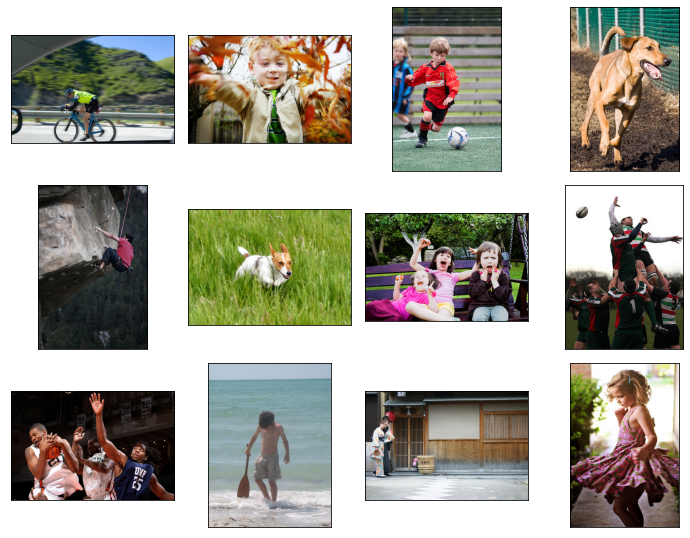

In [5]:
#Визуализируем данные
samples_train = list(train_data['image'].sample(12))
samples_test = list(test_query['image'].sample(12))

fig = plt.figure(figsize=(10,10))
for i in range(12):
    fig.add_subplot(4, 4, i+1)
    plt.imshow(Image.open(Path(PATH, 'train_images', samples_train[i])))
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()

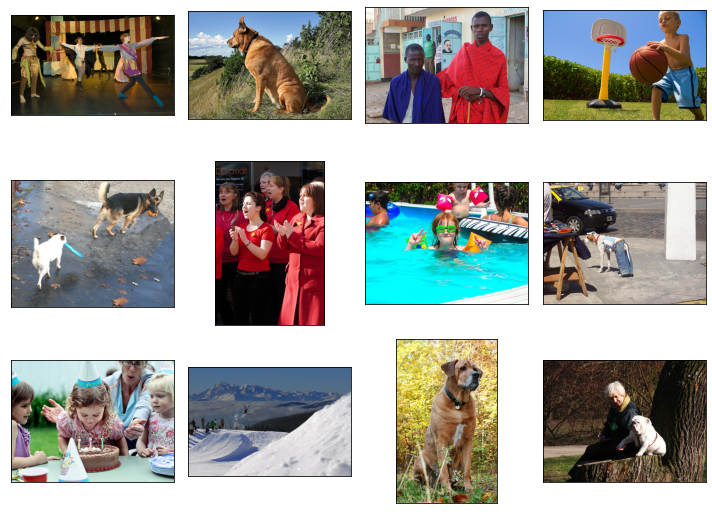

In [6]:
fig = plt.figure(figsize=(10,10))
for i in range(12):
    fig.add_subplot(4, 4, i+1)
    plt.imshow(Image.open(Path(PATH, 'test_images', samples_test[i])))
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()

In [7]:
#Проверим не дублируются ли данные
print('Количество описаний которые встречаются в обоих данных:', len(
    set(train_data['query_text']) & set(test_query['query_text'])))

print('Количество изображений которые встречаются в обоих данных:', len(set(train_data['image']) & set(test_query['image'])))

Количество описаний которые встречаются в обоих данных: 0
Количество изображений которые встречаются в обоих данных: 0


**Вывод:**

Мы провели первичный осмотр данных и заметили что у нас нет пересечений по картинкам и изображениям в тестовых и тренировочных данных

Перейдём к аггрегации оценок

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
ОК, вижу что ты провел исследование. Посмотрел ключевые таблички + изображения. </div>

### Агрегация оценок

In [8]:
# Напишем агрегирущую функцию для DF data_expert

def aggregation(row):

    # Если оценки не равны то берем среднее и округляем в меньшую сторону
    if row['first_mark'] != row['second_mark'] != row['third_mark']:
        row['agr_expert'] = (row['first_mark'] + row['second_mark'] + row['third_mark']) // 3 / 4
    else:
        row['agr_expert'] = int(np.median(row['first_mark':'third_mark'])) / 4

    return row

data_expert = data_expert.progress_apply(aggregation, axis=1)
display(data_expert.head(10))
print(data_expert['agr_expert'].describe())

100%|████████████████████████████████████████████████████████████████████████████| 5822/5822 [00:02<00:00, 2510.82it/s]


image                     query_id  first_mark  \
0  1056338697_4f7d7ce270.jpg  2549968784_39bfbe44f9.jpg#2           1   
1  1056338697_4f7d7ce270.jpg  2718495608_d8533e3ac5.jpg#2           1   
2  1056338697_4f7d7ce270.jpg  3181701312_70a379ab6e.jpg#2           1   
3  1056338697_4f7d7ce270.jpg  3207358897_bfa61fa3c6.jpg#2           1   
4  1056338697_4f7d7ce270.jpg  3286822339_5535af6b93.jpg#2           1   
5  1056338697_4f7d7ce270.jpg  3360930596_1e75164ce6.jpg#2           1   
6  1056338697_4f7d7ce270.jpg  3545652636_0746537307.jpg#2           1   
7  1056338697_4f7d7ce270.jpg   434792818_56375e203f.jpg#2           1   
8   106490881_5a2dd9b7bd.jpg  1425069308_488e5fcf9d.jpg#2           1   
9   106490881_5a2dd9b7bd.jpg  1714316707_8bbaa2a2ba.jpg#2           2   

   second_mark  third_mark  agr_expert  
0            1           1        0.25  
1            1           2        0.25  
2            1           2        0.25  
3            2           2        0.50  
4            1           2        0.25  
5            1           1        0.25  
6            1           1        0.25  
7            1           2        0.25  
8            1           1        0.25  
9            2           2        0.50

count    5822.000000
mean        0.406089
std         0.214055
min         0.250000
25%         0.250000
50%         0.250000
75%         0.500000
max         1.000000
Name: agr_expert, dtype: float64


In [9]:
data_scores = pd.merge(data_expert, data_crowd, how='outer', on=['image', 'query_id'])

def score_aggregate(row):

    if np.isnan(row['agr_expert']):
        row['score'] = row['Share_people']
    elif np.isnan(row['Share_people']):
        row['score'] = row['agr_expert']
    else:
        row['score'] = row['agr_expert'] * 0.6 + row['Share_people'] * 0.4

    return row

data_scores = data_scores.apply(score_aggregate, axis=1)

In [10]:
display(data_scores.head(10))
print(data_scores['score'].describe(), '\n')
print(data_scores['score'].unique())

image                     query_id  first_mark  \
0  1056338697_4f7d7ce270.jpg  2549968784_39bfbe44f9.jpg#2         1.0   
1  1056338697_4f7d7ce270.jpg  2718495608_d8533e3ac5.jpg#2         1.0   
2  1056338697_4f7d7ce270.jpg  3181701312_70a379ab6e.jpg#2         1.0   
3  1056338697_4f7d7ce270.jpg  3207358897_bfa61fa3c6.jpg#2         1.0   
4  1056338697_4f7d7ce270.jpg  3286822339_5535af6b93.jpg#2         1.0   
5  1056338697_4f7d7ce270.jpg  3360930596_1e75164ce6.jpg#2         1.0   
6  1056338697_4f7d7ce270.jpg  3545652636_0746537307.jpg#2         1.0   
7  1056338697_4f7d7ce270.jpg   434792818_56375e203f.jpg#2         1.0   
8   106490881_5a2dd9b7bd.jpg  1425069308_488e5fcf9d.jpg#2         1.0   
9   106490881_5a2dd9b7bd.jpg  1714316707_8bbaa2a2ba.jpg#2         2.0   

   second_mark  third_mark  agr_expert  Share_people  is_true  is_false  score  
0          1.0         1.0        0.25           0.0      0.0       3.0   0.15  
1          1.0         2.0        0.25           0.0      0.0       3.0   0.15  
2          1.0         2.0        0.25           NaN      NaN       NaN   0.25  
3          2.0         2.0        0.50           NaN      NaN       NaN   0.50  
4          1.0         2.0        0.25           NaN      NaN       NaN   0.25  
5          1.0         1.0        0.25           NaN      NaN       NaN   0.25  
6          1.0         1.0        0.25           NaN      NaN       NaN   0.25  
7          1.0         2.0        0.25           0.0      0.0       3.0   0.15  
8          1.0         1.0        0.25           NaN      NaN       NaN   0.25  
9          2.0         2.0        0.50           NaN      NaN       NaN   0.50

count    51323.000000
mean         0.094782
std          0.216178
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: score, dtype: float64 

[0.15       0.25       0.5        0.3        0.58333333 0.45
 0.43333333 0.75       0.86666667 1.         0.85       0.56666667
 0.71666667 0.28333333 0.73333333 0.55       0.65       0.38
 0.61       0.7        0.77       0.4        0.6        0.
 0.33333333 0.66666667 0.2        0.16666667 0.8       ]


In [11]:
train_data = pd.merge(train_data, data_scores[['image', 'query_id', 'score']], how='outer', on=['image', 'query_id'])
display(train_data.head(10))
train_data.info()

image                     query_id  \
0  1056338697_4f7d7ce270.jpg  2549968784_39bfbe44f9.jpg#2   
1  1262583859_653f1469a9.jpg  2549968784_39bfbe44f9.jpg#2   
2  2447284966_d6bbdb4b6e.jpg  2549968784_39bfbe44f9.jpg#2   
3  2549968784_39bfbe44f9.jpg  2549968784_39bfbe44f9.jpg#2   
4  2621415349_ef1a7e73be.jpg  2549968784_39bfbe44f9.jpg#2   
5  3030566410_393c36a6c5.jpg  2549968784_39bfbe44f9.jpg#2   
6  3155451946_c0862c70cb.jpg  2549968784_39bfbe44f9.jpg#2   
7  3222041930_f642f49d28.jpg  2549968784_39bfbe44f9.jpg#2   
8   343218198_1ca90e0734.jpg  2549968784_39bfbe44f9.jpg#2   
9  3718964174_cb2dc1615e.jpg  2549968784_39bfbe44f9.jpg#2   

                                          query_text  score  
0  A young child is wearing blue goggles and sitt...   0.15  
1  A young child is wearing blue goggles and sitt...   0.25  
2  A young child is wearing blue goggles and sitt...   0.30  
3  A young child is wearing blue goggles and sitt...   1.00  
4  A young child is wearing blue goggles and sitt...   0.25  
5  A young child is wearing blue goggles and sitt...   0.30  
6  A young child is wearing blue goggles and sitt...   0.25  
7  A young child is wearing blue goggles and sitt...   0.25  
8  A young child is wearing blue goggles and sitt...   0.25  
9  A young child is wearing blue goggles and sitt...   0.15

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51323 entries, 0 to 51322
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   image       51323 non-null  object 
 1   query_id    51323 non-null  object 
 2   query_text  5822 non-null   object 
 3   score       51323 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.6+ MB


Избавимся от пропусков

In [12]:
def fill_null(row):

    if pd.isnull(row['query_text']):
        texts =  train_data.loc[train_data['query_id'] == row['query_id'], 'query_text']
        if len(texts) > 0:
            row['query_text'] = texts.iloc[0]

    return row

train_data = train_data.apply(fill_null, axis=1)

In [13]:
display(train_data.head(10))
train_data.info()

image                     query_id  \
0  1056338697_4f7d7ce270.jpg  2549968784_39bfbe44f9.jpg#2   
1  1262583859_653f1469a9.jpg  2549968784_39bfbe44f9.jpg#2   
2  2447284966_d6bbdb4b6e.jpg  2549968784_39bfbe44f9.jpg#2   
3  2549968784_39bfbe44f9.jpg  2549968784_39bfbe44f9.jpg#2   
4  2621415349_ef1a7e73be.jpg  2549968784_39bfbe44f9.jpg#2   
5  3030566410_393c36a6c5.jpg  2549968784_39bfbe44f9.jpg#2   
6  3155451946_c0862c70cb.jpg  2549968784_39bfbe44f9.jpg#2   
7  3222041930_f642f49d28.jpg  2549968784_39bfbe44f9.jpg#2   
8   343218198_1ca90e0734.jpg  2549968784_39bfbe44f9.jpg#2   
9  3718964174_cb2dc1615e.jpg  2549968784_39bfbe44f9.jpg#2   

                                          query_text  score  
0  A young child is wearing blue goggles and sitt...   0.15  
1  A young child is wearing blue goggles and sitt...   0.25  
2  A young child is wearing blue goggles and sitt...   0.30  
3  A young child is wearing blue goggles and sitt...   1.00  
4  A young child is wearing blue goggles and sitt...   0.25  
5  A young child is wearing blue goggles and sitt...   0.30  
6  A young child is wearing blue goggles and sitt...   0.25  
7  A young child is wearing blue goggles and sitt...   0.25  
8  A young child is wearing blue goggles and sitt...   0.25  
9  A young child is wearing blue goggles and sitt...   0.15

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51323 entries, 0 to 51322
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   image       51323 non-null  object 
 1   query_id    51323 non-null  object 
 2   query_text  50214 non-null  object 
 3   score       51323 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.6+ MB


Некоторые пропуски нам изменить не получилось, поэтому избавимся от этих данных

In [14]:
train_data.dropna(inplace=True)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50214 entries, 0 to 51322
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   image       50214 non-null  object 
 1   query_id    50214 non-null  object 
 2   query_text  50214 non-null  object 
 3   score       50214 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.9+ MB


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Предобработка закончена, получен единый датафрейм с оценками. </div>


## 2. Проверка данных

В некоторых странах, где работает ваша компания, действуют ограничения по обработке изображений: поисковым сервисам и сервисам, предоставляющим возможность поиска, запрещено без разрешения родителей или законных представителей предоставлять любую информацию, в том числе, но не исключительно тексты, изображения, видео и аудио, содержащие описание, изображение или запись голоса детей. Ребёнком считается любой человек, не достигший 16 лет.

В вашем сервисе строго следуют законам стран, в которых работают. Поэтому при попытке посмотреть изображения, запрещённые законодательством, вместо картинок показывается дисклеймер:

> This image is unavailable in your country in compliance with local laws
>

Однако у вас в PoC нет возможности воспользоваться данным функционалом. Поэтому все изображения, которые нарушают данный закон, нужно удалить из обучающей выборки.

Избавимся от нелегального контента

In [15]:
l = WordNetLemmatizer()

WORD_TO_BLOCK = ['child', 'boy', 'girl', 'baby', 'teen', 'teenager', 'kid',
                 'kids', 'children', 'boys', 'girls', 'babies', 'teens', 'teenagers']

def get_lemmas(text):

    text = re.sub('[^a-zA-Z]', ' ', text).lower()
    text = nltk.word_tokenize(text, language = 'english')
    text = [l.lemmatize(word) for word in text]
    return text


def cleaning(row):
    if row['image'] in image_block:
        row['word_to_block'] = 1
    else:
        row['word_to_block'] = 0

    return row

def get_image_block(row):
    text = get_lemmas(row['query_text'])
    bin_array = [i for i in text if i in WORD_TO_BLOCK]
    if bin_array:
        row['image_block'] = row['query_id'][:-2]
    else:
        row['image_block'] = '-'

    return row

train_data = train_data.progress_apply(get_image_block, axis=1)
image_block = train_data['image_block'].unique()

train_data = train_data.progress_apply(cleaning, axis=1)

100%|██████████████████████████████████████████████████████████████████████████| 50214/50214 [00:14<00:00, 3523.16it/s]


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Идея с лемматизацией хороша. Но она очень "дорогая" - хорошая лемматизация занимает время. Поэтому я считаю возможным упростить себе жизнь - взять возможные словоформы "запрещенных" слов. Для существительных их всего две - единственное и множественное число.
    
    
</div>

Выведем заблокированные изображения

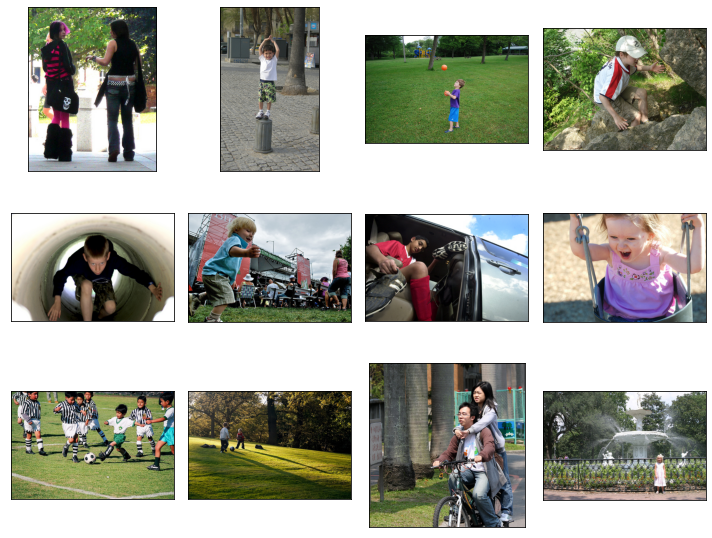

In [16]:
samples_block = list(train_data[train_data['image_block'] != '-']['query_id'].sample(12))

fig = plt.figure(figsize=(10,10))
for i in range(12):
    fig.add_subplot(4, 4, i+1)
    image = Image.open(Path(PATH, 'train_images', samples_block[i][:-2]))
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()

Удалим заблокированные изображения

In [17]:
train_data = train_data.loc[train_data['word_to_block'] == 0]
train_data.drop(columns=['word_to_block'], inplace=True)
train_data.reset_index(inplace=True, drop=True)
display(train_data.head(10))
print(train_data.info())
print(train_data.describe())

image                     query_id  \
0  1056338697_4f7d7ce270.jpg  2549968784_39bfbe44f9.jpg#2   
1  1262583859_653f1469a9.jpg  2549968784_39bfbe44f9.jpg#2   
2  2621415349_ef1a7e73be.jpg  2549968784_39bfbe44f9.jpg#2   
3  3155451946_c0862c70cb.jpg  2549968784_39bfbe44f9.jpg#2   
4  3222041930_f642f49d28.jpg  2549968784_39bfbe44f9.jpg#2   
5   343218198_1ca90e0734.jpg  2549968784_39bfbe44f9.jpg#2   
6  3718964174_cb2dc1615e.jpg  2549968784_39bfbe44f9.jpg#2   
7   486712504_36be449055.jpg  2549968784_39bfbe44f9.jpg#2   
8  1056338697_4f7d7ce270.jpg  2718495608_d8533e3ac5.jpg#2   
9  1167669558_87a8a467d6.jpg  2718495608_d8533e3ac5.jpg#2   

                                          query_text  score  \
0  A young child is wearing blue goggles and sitt...   0.15   
1  A young child is wearing blue goggles and sitt...   0.25   
2  A young child is wearing blue goggles and sitt...   0.25   
3  A young child is wearing blue goggles and sitt...   0.25   
4  A young child is wearing blue goggles and sitt...   0.25   
5  A young child is wearing blue goggles and sitt...   0.25   
6  A young child is wearing blue goggles and sitt...   0.15   
7  A young child is wearing blue goggles and sitt...   0.25   
8  A girl wearing a yellow shirt and sunglasses s...   0.15   
9  A girl wearing a yellow shirt and sunglasses s...   0.30   

                 image_block  
0  2549968784_39bfbe44f9.jpg  
1  2549968784_39bfbe44f9.jpg  
2  2549968784_39bfbe44f9.jpg  
3  2549968784_39bfbe44f9.jpg  
4  2549968784_39bfbe44f9.jpg  
5  2549968784_39bfbe44f9.jpg  
6  2549968784_39bfbe44f9.jpg  
7  2549968784_39bfbe44f9.jpg  
8  2718495608_d8533e3ac5.jpg  
9  2718495608_d8533e3ac5.jpg

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36105 entries, 0 to 36104
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   image        36105 non-null  object 
 1   query_id     36105 non-null  object 
 2   query_text   36105 non-null  object 
 3   score        36105 non-null  float64
 4   image_block  36105 non-null  object 
dtypes: float64(1), object(4)
memory usage: 1.4+ MB
None
              score
count  36105.000000
mean       0.103709
std        0.226528
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000


Посмотрим удалились ли все недоступные картинки

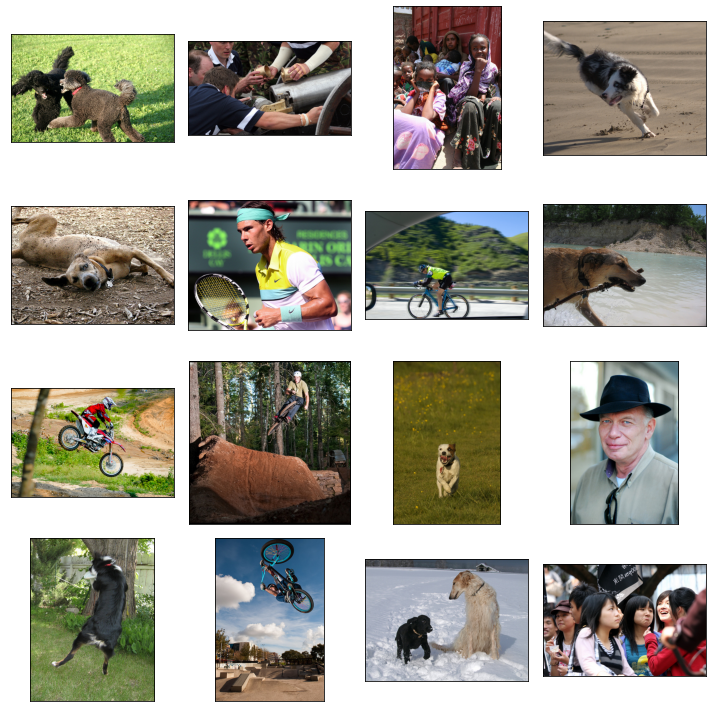

In [18]:
samples_train = list(train_data['image'].sample(16))

fig = plt.figure(figsize=(10,10))
for i in range(16):
    fig.add_subplot(4, 4, i+1)
    image = Image.open(Path(PATH, 'train_images', samples_train[i]))
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()

**Вывод:**

Мы удалили часть изображения, связанных с описанием детей. Если присмотреться, то можно заметить, что уже в новом DF train всё ещё остались картинки с детьми - это наблюдения с низкой агрегирующей функцией score, которое имеют некорректное описание. Для удаления использовался следующий массив слов: ['child', 'boy', 'girl', 'baby', 'teen', 'teenager', 'kid', 'infant', 'youngster']

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента</b></font>
   
Я удалил по второму предложеному способу, заметил что по сравнению с предыдущим вариантом датасет сократился лишь на 20 позиций, решил повыводить картинки и заметил, что некоторые изображения с подростками все же остались например 2295216243_0712928988 и 416788726_5b4eb1466e, то есть правильно я понимаю что от всех этих изображений все избавиться не получится, из за того, что у некоторых изображений нет упоминания детей в описании ?

</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
    
Ты удалил записи с комментариями, в которых были запрещенные слова. Но наша задача убрать из датасета изображения, содержащие детей. Есть два способа сделать это:
    
 - Определить список плохих изображений, как изображения удовлетворяющие условиям:
    - Комментарий содержит плохие слова
    - <b>Оценка соответствия комментария и изображения выше порога.</b>
 - Удалить из нашего датасета все пары "изображение/описание" с плохими изображениями.
    
 
И второй, очень красивый способ. Он основан на том, что `query_id` содержит в с себе имя изображения, для которого он был написан (такая пасхалочка от авторов датасета).
    
 - Определить список плохих комментариев
 - У `query_id`  плохих комментариев отрезать два последних символа и получим список плохих изображений.
    
Самое интересное ты используешь этот способ что-бы вывести фото с детьми. Но удаляешь по принципу "в описании есть слово "ребенок"     
    
    
    
</div>

## 3. Векторизация изображений

Перейдём к векторизации изображений.

Самый примитивный способ — прочесть изображение и превратить полученную матрицу в вектор. Такой способ нам не подходит: длина векторов может быть сильно разной, так как размеры изображений разные. Поэтому стоит обратиться к свёрточным сетям: они позволяют "выделить" главные компоненты изображений. Как это сделать? Нужно выбрать какую-либо архитектуру, например ResNet-18, посмотреть на слои и исключить полносвязные слои, которые отвечают за конечное предсказание. При этом можно загрузить модель данной архитектуры, предварительно натренированную на датасете ImageNet.

Found 36105 validated image filenames.


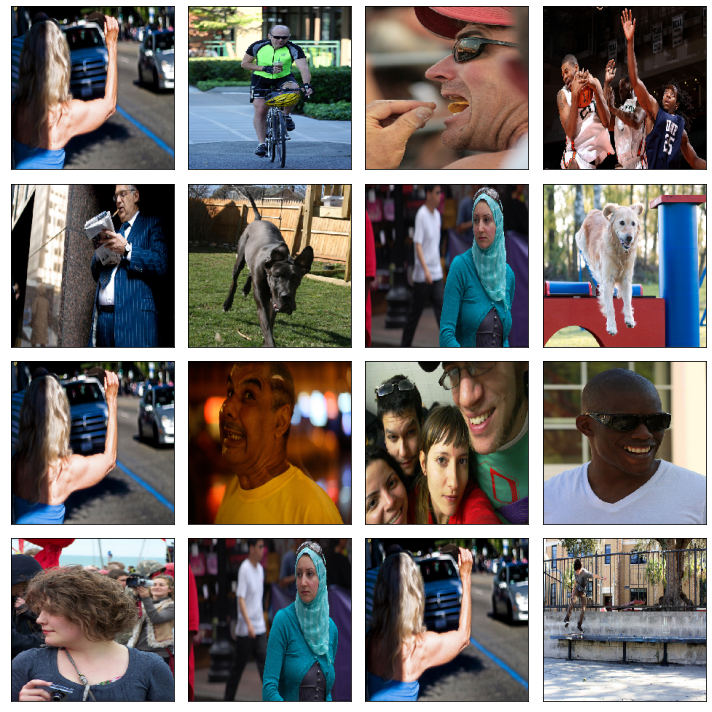

In [19]:
def load_train():
    train_datagen = ImageDataGenerator(rescale=1./255)

    train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=train_data,
        directory=Path(PATH, 'train_images'),
        x_col='image',
        y_col='score',
        target_size=(224, 224),
        batch_size=16,
        class_mode='input',
        shuffle = False,
        seed=12345)

    return train_gen_flow

flow_train = load_train()
features, target = next(flow_train)

fig = plt.figure(figsize=(10,10))
for i in range(16):
    fig.add_subplot(4, 4, i+1)
    plt.imshow(features[i])
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()
plt.show()

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Вот здесь проблема, и она заключается в том, что  у flow_from_dataframe есть дефолтный аргумент shuffle=True, а значит выдаваемые им изображения перемешиваются, и идут совсем не в том порядке,как в датфрейме.  Как следствие мы получаем эмбеддинги не соответствующие изображениям в датафрейме.</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента</b></font>
   
Поставил значение shuffle = False, и поменял разрешение на 224x224

</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Модель ResNEt обучалась на изображениях размером 224х224. Подавая изображения других размеров ты во первых используешь модель не в оптимальном режиме. Во вторых сжимая изображения ты теряешь информацию.

</div>

Создадим модель

In [20]:
def create_model():
    backbone = ResNet50(input_shape=(224, 224, 3),
                        include_top=False,
                        weights='imagenet')

    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.compile(loss='mean_squared_error', optimizer=Adam(lr=0.0001), metrics=['mae'])

    return model

def vectorize_pictures(model, train_data):
    predictions = model.predict(train_data)
    return predictions

In [21]:
image_embeding = vectorize_pictures(create_model(), load_train())
image_embeding.shape

C:\Anaconda\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Found 36105 validated image filenames.
2257/2257 [==============================] - 1272s 563ms/step


(36105, 2048)

**Вывод:**

Мы векторизировали изображений с помощью нейросети ResNet50

## 4. Векторизация текстов

Следующий этап — векторизация текстов. Вы можете поэкспериментировать с несколькими способами векторизации текстов:

- tf-idf
- word2vec
- \*трансформеры (например Bert)

\* — если вы изучали трансформеры в спринте Машинное обучение для текстов.


Используем трансформер Bert и загрузим препроцессор

In [22]:
bert = keras_nlp.models.BertBackbone.from_preset('bert_base_en')
preprocessor = keras_nlp.models.BertPreprocessor.from_preset('bert_base_en')

Получим эмбеддинги

In [23]:
def vectorize_text(model, data, preprocessor=preprocessor, batch_size=32, bar=True, verbose=0):

    embeddings = []
    tokenized = preprocessor(data)

    if bar:
        for i in notebook.tqdm(range(tokenized['token_ids'].shape[0] // batch_size + 1)):

            tokens = tokenized['token_ids'][batch_size*i:batch_size*(i+1)]
            token_types = tokenized['segment_ids'][batch_size*i:batch_size*(i+1)]
            mask = tokenized['padding_mask'][batch_size*i:batch_size*(i+1)]

            batch = {'token_ids' : tokens,
                    'segment_ids' : token_types,
                    'padding_mask' : mask}

            batch_embeddings = model.predict(batch, verbose=verbose)

            embeddings.append(batch_embeddings['pooled_output'])

    else:
        for i in range(tokenized['token_ids'].shape[0] // batch_size + 1):

            tokens = tokenized['token_ids'][batch_size*i:batch_size*(i+1)]
            token_types = tokenized['segment_ids'][batch_size*i:batch_size*(i+1)]
            mask = tokenized['padding_mask'][batch_size*i:batch_size*(i+1)]

            batch = {'token_ids' : tokens,
                    'segment_ids' : token_types,
                    'padding_mask' : mask}

            batch_embeddings = model.predict(batch, verbose=verbose)

            embeddings.append(batch_embeddings['pooled_output'])

    return np.concatenate(embeddings)

In [25]:
print(text_embeds.shape)

(36105, 768)


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Отлично,полученные векторные представления для текстов описаний с помощью BERT </div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Но есть проблема и   и заключается она в следующем. Выполняется эта ячейка очень долго.  При этом в датасете у нас всего 977 уникальных текстов (а сейчас после чистки от детских изображений у тебя осталось и того меньше, около 700). Но ты векторизуешь 36 тысяч описаний, значит каждое описание в серднем 50 раз. Не очень оптимально, особенно если ждать выполнения ячейки даже при запуске на GPU приходится 30-40 минут. </div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента</b></font>
   
Мог бы ты подсказать, просто по данному замечанию я для себя нашел только одно решиние это отсортировать изначально train_data по query_text, и посчитать с помощью value_counts количество каждого описания и потом в фукцию создания эмбенгдингов кинуть уникальные значения описаний и когда мы добавляем элемент в embeddings мы создаем цикл в котором добавляем определенное количество значений исходя из value_counts или есть более простое решение ?

</div>

**Вывод:**

Используя трансформер Bert, мы получили эмбеддинги

## 5. Объединение векторов

Подготовьте данные для обучения: объедините векторы изображений и векторы текстов с целевой переменной.

In [26]:
features = np.concatenate((image_embeding, text_embeds), axis=1)
print(features.shape)
target = np.array(train_data['score'])
print(target.shape)

(36105, 2816)
(36105,)


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 Вектора, полученные из текста и изображения объеденены👍 </div>

## 6. Обучение модели предсказания соответствия

Для обучения разделите датасет на тренировочную и тестовую выборки. Простое случайное разбиение не подходит: нужно исключить попадание изображения и в обучающую, и в тестовую выборки.
Для того чтобы учесть изображения при разбиении, можно воспользоваться классом [GroupShuffleSplit](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GroupShuffleSplit.html) из библиотеки sklearn.model_selection.

Код ниже разбивает датасет на тренировочную и тестовую выборки в пропорции 7:3 так, что строки с одинаковым значением 'group_column' будут содержаться либо в тестовом, либо в тренировочном датасете.

```
from sklearn.model_selection import GroupShuffleSplit
gss = GroupShuffleSplit(n_splits=1, train_size=.7, random_state=42)
train_indices, test_indices = next(gss.split(X=df.drop(columns=['target']), y=df['target'], groups=df['group_column']))
train_df, test_df = df.loc[train_indices], df.loc[test_indices]

```

Какую модель использовать — выберите самостоятельно. Также вам предстоит выбрать метрику качества либо реализовать свою.

Получим обучающею и тестовую выборки

In [27]:
gss = GroupShuffleSplit(n_splits=1, train_size=.75, random_state=12345)
train_indices, test_indices = next(gss.split(X=features, y=target, groups=train_data['image']))

features_train, features_test = features[train_indices], features[test_indices]
target_train, target_test = target[train_indices], target[test_indices]

print(features_train.shape, features_test.shape, target_train.shape, target_test.shape)

(27273, 2816) (8832, 2816) (27273,) (8832,)


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Отлично, благодаря использованию GroupShuffleSplit ты исключаешь попадание одного изображения в обучающий и валидационный наборы.</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Только давай разберемся с выборками. Финальное тестирование (визуальное) мы делаем на отложенной выборке. Поэтому выборка,которую ты сейчас отделил играет роль валидационной. Есть смысл в её названии использовать слово valid а не test</div>

Отмаштабируем данные

In [28]:
scaler = StandardScaler()
scaler.fit(features_train)
features_train = scaler.transform(features_train)
features_test = scaler.transform(features_test)

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 </div>

Для обучения выберем метрику RMSE(среднеквадратичная ошибка) данная метрика подходит для задач регрессии и RMSE будет активнее реагировать на большие выбросы в предсказаниях, поэтому может быть более точным показателем качетва модели.

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 </div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Мы решаем новую задачу и не знаем, наксколько хороши наши метрики и наши модели. Поэтому советую начать с бейзлайна - константной модели.</div>

**Исследование модели Ridge**

In [71]:
%%time
model_ridge = Ridge(solver = 'lsqr').fit(features_train, target_train)

CPU times: total: 14.2 s
Wall time: 1.26 s


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Здесь и далее прошу тебя отказаться от кросс-валидациии. Дело в том, что сравнивать между собой модели на валидационной выборке и с помощью кросс-валидации некорректно. А модель keras ты оцениваешь на валидационной выборке.  </div>

In [72]:
%%time
model_ridge_predictions = model_ridge.predict(features_test)

CPU times: total: 15.6 ms
Wall time: 24 ms


In [73]:
print('RMSE Ridge =', sqrt(mean_squared_error(target_test, model_ridge_predictions)))

RMSE Ridge = 0.42208229311291395


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Мы не оцениваем модели на обучающей выборке. Для сравнения моделей между собой мы используем либо данные полученные с помощью кросс-валидации, либо данные полученные на данных, которые модель не видела (валидационных)  </div>

**Исследование модели решающего дерева**

In [74]:
%%time
model_DTR = DecisionTreeRegressor(random_state=12345, max_depth = 10, min_samples_leaf = 20).fit(features_train, target_train)

CPU times: total: 13.7 s
Wall time: 13.7 s


In [75]:
%%time
model_DTR_predictions = model_DTR.predict(features_test)

CPU times: total: 31.2 ms
Wall time: 20.6 ms


In [76]:
print('RMSE DTR =', sqrt(mean_squared_error(target_test, model_DTR_predictions)))

RMSE DTR = 0.22774367528746722


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Мы не оцениваем модели на обучающей выборке. Для сравнения моделей между собой мы используем либо данные полученные с помощью кросс-валидации, либо данные полученные на данных, которые модель не видела (валидационных)  </div>

**Исследование модели случайного леса**

In [77]:
%%time
model_RFR = RandomForestRegressor(n_estimators = 100 ,max_depth = 10, random_state=12345).fit(features_train, target_train)

CPU times: total: 16min 20s
Wall time: 16min 21s


In [78]:
%%time
model_RFR_predictions = model_RFR.predict(features_test)

CPU times: total: 172 ms
Wall time: 161 ms


In [79]:
print('RMSE RFR =', sqrt(mean_squared_error(target_test, model_RFR_predictions)))

RMSE RFR = 0.2123707919610322


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Мы не оцениваем модели на обучающей выборке. Для сравнения моделей между собой мы используем либо данные полученные с помощью кросс-валидации, либо данные полученные на данных, которые модель не видела (валидационных)  </div>

**Исследование модели CatBoost**

In [80]:
%%time
model_cat = CatBoostRegressor(n_estimators = 100 ,depth = 10, loss_function = 'RMSE',
                              verbose = 250, random_state = 12345).fit(features_train, target_train)

Learning rate set to 0.448772
0:	learn: 0.2237394	total: 1.87s	remaining: 3m 4s
99:	learn: 0.1234308	total: 3m 19s	remaining: 0us
CPU times: total: 44min 13s
Wall time: 3min 20s


In [81]:
%%time
model_cat_predictions = model_cat.predict(features_test)

CPU times: total: 438 ms
Wall time: 429 ms


In [82]:
print('RMSE cat =', sqrt(mean_squared_error(target_test, model_cat_predictions)))

RMSE cat = 0.2251711828490692


**Исследование нейронной сети**

In [83]:
model_network = Sequential()
model_network.add(Dense(1024, activation='relu', input_shape=(2816,)))
model_network.add(BatchNormalization())
model_network.add(Dense(512, activation='tanh'))
model_network.add(Dropout(0.2))
model_network.add(Dense(256, activation='relu'))
model_network.add(BatchNormalization())
model_network.add(Dense(128, activation='relu'))
model_network.add(BatchNormalization())
model_network.add(Dense(64, activation='relu'))
model_network.add(Flatten())
model_network.add(Dense(1, activation='linear'))


model_network.compile(loss='mean_squared_error',
                optimizer = Adam(lr=0.0001),
                metrics=[RootMeanSquaredError()])

model_network.build()

model_network.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1024)              2884608   
                                                                 
 batch_normalization_3 (Batc  (None, 1024)             4096      
 hNormalization)                                                 
                                                                 
 dense_7 (Dense)             (None, 512)               524800    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_8 (Dense)             (None, 256)               131328    
                                                                 
 batch_normalization_4 (Batc  (None, 256)              1024      
 hNormalization)                                      

C:\Anaconda\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [84]:
%%time
model_network.fit(features_train,
             target_train,
             epochs=10,
             batch_size=32,
             validation_data=(features_test, target_test),
             validation_steps = math.ceil(features_train.shape[1]/32),
             shuffle=True,
             verbose=2)

Epoch 1/10
853/853 - 14s - loss: 0.2251 - root_mean_squared_error: 0.4744 - val_loss: 0.1094 - val_root_mean_squared_error: 0.3307 - 14s/epoch - 17ms/step
Epoch 2/10
853/853 - 13s - loss: 0.0854 - root_mean_squared_error: 0.2922 - val_loss: 0.0816 - val_root_mean_squared_error: 0.2856 - 13s/epoch - 15ms/step
Epoch 3/10
853/853 - 13s - loss: 0.0671 - root_mean_squared_error: 0.2590 - val_loss: 0.0761 - val_root_mean_squared_error: 0.2759 - 13s/epoch - 15ms/step
Epoch 4/10
853/853 - 13s - loss: 0.0598 - root_mean_squared_error: 0.2445 - val_loss: 0.0707 - val_root_mean_squared_error: 0.2659 - 13s/epoch - 15ms/step
Epoch 5/10
853/853 - 13s - loss: 0.0565 - root_mean_squared_error: 0.2376 - val_loss: 0.0695 - val_root_mean_squared_error: 0.2636 - 13s/epoch - 15ms/step
Epoch 6/10
853/853 - 13s - loss: 0.0548 - root_mean_squared_error: 0.2341 - val_loss: 0.0686 - val_root_mean_squared_error: 0.2618 - 13s/epoch - 15ms/step
Epoch 7/10
853/853 - 13s - loss: 0.0526 - root_mean_squared_error: 0.2

In [88]:
%%time
model_network_predictions = model_network.predict(features_test)

276/276 [==============================] - 1s 5ms/step
CPU times: total: 7.38 s
Wall time: 1.54 s


In [89]:
print('RMSE network =', sqrt(mean_squared_error(target_test, model_network_predictions)))

RMSE network = 0.22138777943227875


<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Мне кажется это лишняя операция. Зачем тебе предсказание модели на обучающей выборке?</div>

In [90]:
#Построим таблицу для сравнения
lines = [["1.26 s", "24 ms", 0.422],
        ["13.7 s", "20.6 ms", 0.228],
        ["16min 21s", "161 ms", 0.212],
        ["3min 20s", "429 ms", 0.225],
        ["2min 9s", "1.54 s", 0.221]]
titles = ["Ridge", "DecisionTreeRegressor", "RandomForestRegressor", "CatBoostRegressor", "Neural Network"]
pd.DataFrame(data=lines, index=titles, columns=["fit_time", "predict_time", "RMSE"])

fit_time predict_time   RMSE
Ridge                     1.26 s        24 ms  0.422
DecisionTreeRegressor     13.7 s      20.6 ms  0.228
RandomForestRegressor  16min 21s       161 ms  0.212
CatBoostRegressor       3min 20s       429 ms  0.225
Neural Network           2min 9s       1.54 s  0.221

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Я вижу что у нейронной сети у тебя 0,2552 по последней эпохе, значит она самая худшая. Откуда взялось 0,228? </div>

Одни из лучших показателей на тестовой выборке у нас у нейронной сети, хотя у RandomForest RMSE больше, нейронная сеть значительно привосходит его по времени обучения, поэтому остановим свой выбор

## 7. Тестирование модели

Настало время протестировать модель. Для этого получите эмбеддинги для всех тестовых изображений из папки `test_images`, выберите случайные 10 запросов из файла `test_queries.csv` и для каждого запроса выведите наиболее релевантное изображение. Сравните визуально качество поиска.

In [100]:
def load_test():

    train_datagen = ImageDataGenerator(rescale=1/255.)
    train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=test_image,
        directory=Path(PATH, 'test_images'),
        x_col='image',
        y_col=None,
        target_size=(224, 224),
        batch_size=16,
        class_mode='input',
        shuffle = False,
        seed=12345)

    return train_gen_flow

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Здесь тоже возникают проблемы с перемешиванием данных  </div>

Получим эмбеддинги тестовых картинок.

In [101]:
pict_embeds_test = vectorize_pictures(create_model(), load_test())
pict_embeds_test.shape

Found 100 validated image filenames.


C:\Anaconda\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


7/7 [==============================] - 4s 521ms/step


(100, 2048)

In [102]:
def get_picture(text):
    if [i for i in get_lemmas(text) if i in WORD_TO_BLOCK]:
        print('This image is unavailable in your country in compliance with local laws')
    else:
        text_embed = vectorize_text(model=bert, data=[text], bar=False)

        X = np.concatenate((pict_embeds_test, np.resize(text_embed, (pict_embeds_test.shape[0],768))), axis=1)
        X = scaler.transform(X)

        predictions = model_network.predict(X)

        df = pd.concat((test_image, pd.Series(np.reshape(predictions, (predictions.shape[0],)), name='pred')), axis=1)
        top = list(df.sort_values(by='pred', ascending=False)['image'].head(5))
        top_score = list(df.sort_values(by='pred', ascending=False)['pred'].head(5))

        print(text)

        fig = plt.figure(figsize=(15,5))
        plt.rcParams['axes.edgecolor'] = 'black'
        plt.rcParams['axes.linewidth'] = 0
        for i in range(5):
            fig.add_subplot(1, 6, i+1, title=round(top_score[i], 2))
            image = Image.open(Path(PATH, 'test_images', top[i]))
            plt.imshow(image)
            plt.xticks([])
            plt.yticks([])
            plt.tight_layout()

        if text in list(test_query['query_text']):
            plt.rcParams['axes.edgecolor'] = 'green'
            plt.rcParams['axes.linewidth'] = 5
            fig.add_subplot(1, 6, 6)
            image = Image.open(Path(PATH, 'test_images',
                                    test_query.iloc[test_query[test_query['query_text'] == text].index[0]]['image']))
            plt.imshow(image)
            plt.xticks([])
            plt.yticks([])
            plt.tight_layout()

        plt.show()
    return None

4/4 [==============================] - 0s 6ms/step
Three dirt bike racers head over a jump .


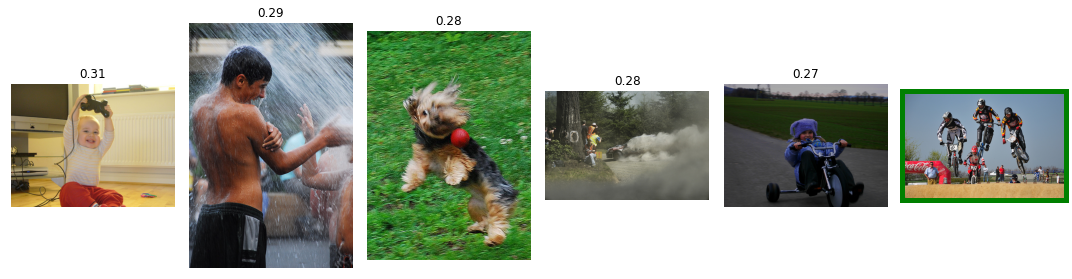

This image is unavailable in your country in compliance with local laws
This image is unavailable in your country in compliance with local laws
This image is unavailable in your country in compliance with local laws
4/4 [==============================] - 0s 6ms/step
a snowboarder wearing red is descending a snow covered mountain .


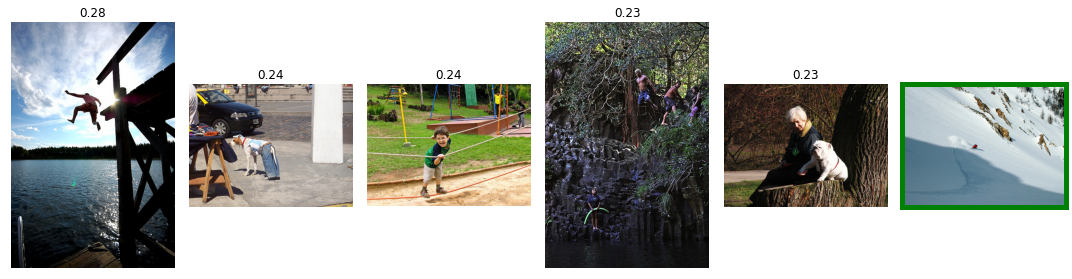

This image is unavailable in your country in compliance with local laws
4/4 [==============================] - 0s 6ms/step
The brown dog is wearing a black collar .


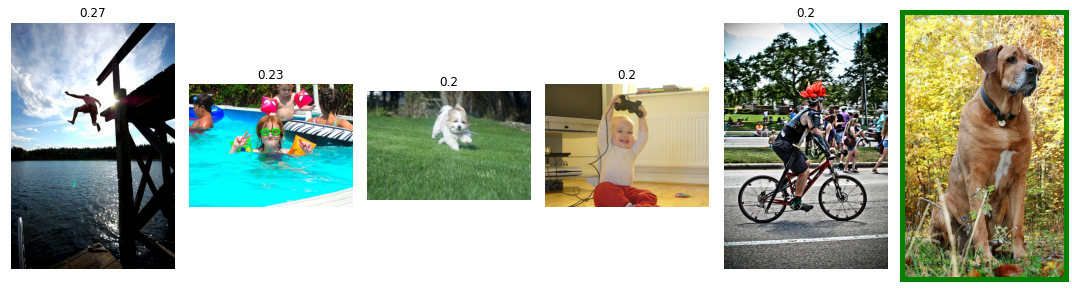

This image is unavailable in your country in compliance with local laws
This image is unavailable in your country in compliance with local laws
4/4 [==============================] - 0s 6ms/step
A man in a blue shirt lifts up his tennis racket and smiles .


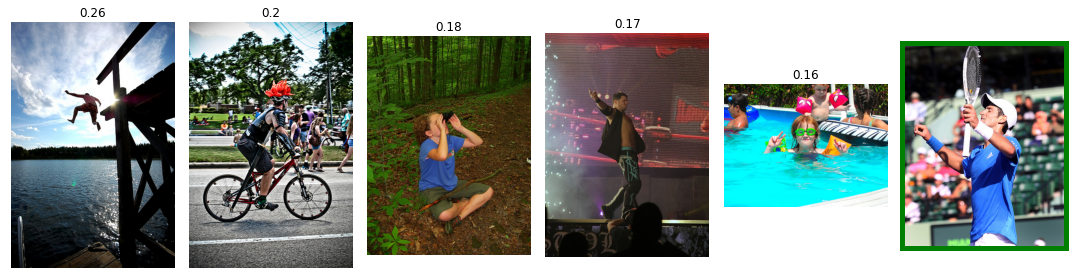

In [103]:
samples = test_query.sample(10)
text_test = list(samples['query_text'])
for text in text_test:
    get_picture(text)

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Функции написаны и со своей задачей справляются. Принимают на вход текст и находят изображение. Отрабатывают контроль "запрещенного контента".

Да, ты прав, к сожалению работают они не очень. И причин тут несколько - мало данных, не очень правильный подход. На мой взгляд более перспективным было бы привести ембеддинги изображений и текстов к одной размерности в одно пространство (через обучаемые слои) и в качестве меры близости использовать косинусное расстояние.
</div>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Идеи и альтернативные подходы</b>
Обычно здесь я пишу про CLIP, но ты его реализовал ниже, поэтому опустим....
    
    
<hr>    
    
Также неплохо работает следующий подход без предобученных моделей (к тому же легко реализуемый).
    
    
Вместо того, чтобы подавать на вход модели изображение + текст и получать меру соответствия, поступаем по другому. 
    
На вход модели подаем вектор описания, а на выходе учимся предсказывать вектор изображения. 
    
По поводу метрик тут ситуация следующая. Точно работает следующий подход
    
  - берем метрику mse, но тогда нужно чтобы модель её уменьшала. А значит в обучении используем только пары заведомо сответствующие друг другу

Можно попробовать использовать косинусное расстояние, она позволяет использовать все данные (если есть соответствие то выдает 1, если нет то 0). 
    
Также можно попробовать усложнить модель, например и изображения и тексты отправлять в пространство размерностью 256 и уже в этом пространстве учиться их "сближать".
    
По поводу методов векторизации: я бы использовать resnet18 для изображений (размерность эмбеддинга избражения 512) и БЕРТ для текстов (768). 
    
***
    
А еще я видел удачный проект, где для векторизации изображений использовалось предсказание Resnet в котором не отключался последний слой. Получился вектор предсказаний верояятности что изображение принадлежит к каждому из 1000 классов Imagenet. И в сочетании с подходом "мешок слов" для текстов это может дать неплохой результа. Такая модель находит людей, собак, машины, снег и т.д.  
   
</div>

**Вывод:**

- Мы очистили данные, где это возможно, от запрещенных изобращений.
- В ходе работы для векторизации изображений мы использовали сеть ResNet50, а для текстовых эмбеддингов BERT base cased EN.
- Мы исследовали следующие модели:

   * Ridge
   * DecisionTreeRegressor
   * RandomForestRegressor
   * CatBoostRegressor
   * Neural Network

- Лучше всего себя показала нейронная сеть, с ней мы провели тесты.

- К сожалению модель не выполнила свою задачу предсказания, и лишь иногда предлагает похожие по контексту изображению, и совсем уж редко попадает в точку

- Возможно данную задачу можно решить используя уже готовые решения например ViT, работу которой я хотел бы продемонстрировать далее


In [104]:
! pip install vit-pytorch
! pip install -U sentence-transformers

In [105]:
import torch
from vit_pytorch import ViT
from sentence_transformers import SentenceTransformer, util
import glob

model_vit = SentenceTransformer('clip-ViT-B-32')

file_paths = list(glob.glob(str(Path(PATH, 'test_images', '*.jpg'))))

image_embed = model_vit.encode([Image.open(i) for i in file_paths],
                                   convert_to_tensor=True,
                                   batch_size=32,
                                   show_progress_bar=True)

image_embed.shape

Batches:   0%|          | 0/4 [00:00<?, ?it/s]

torch.Size([100, 512])

In [106]:
def test_ViT(text):
    if [i for i in get_lemmas(text) if i in WORD_TO_BLOCK]:
        print('This image is unavailable in your country in compliance with local laws')
    else:
        query_embed = model_vit.encode([text], convert_to_tensor=True, show_progress_bar=False)
        hits = util.semantic_search(query_embed, image_embed, top_k=5)[0]

        print(text)

        fig = plt.figure(figsize=(15,5))
        plt.rcParams['axes.edgecolor'] = 'black'
        plt.rcParams['axes.linewidth'] = 0
        for i in range(5):
            fig.add_subplot(1, 6, i+1, title=round(hits[i]['score'], 2))
            image = Image.open(file_paths[hits[i]['corpus_id']])
            plt.imshow(image)
            plt.xticks([])
            plt.yticks([])
            plt.tight_layout()

        if text in list(test_query['query_text']):
            plt.rcParams['axes.edgecolor'] = 'green'
            plt.rcParams['axes.linewidth'] = 5
            fig.add_subplot(1, 6, 6)
            image = Image.open(Path(PATH, 'test_images',
                                    test_query.iloc[test_query[test_query['query_text'] == text].index[0]]['image']))
            plt.imshow(image)
            plt.xticks([])
            plt.yticks([])
            plt.tight_layout()

        plt.show()
    return None

This image is unavailable in your country in compliance with local laws
This image is unavailable in your country in compliance with local laws
A young man sits on a cliff , watching the ocean .


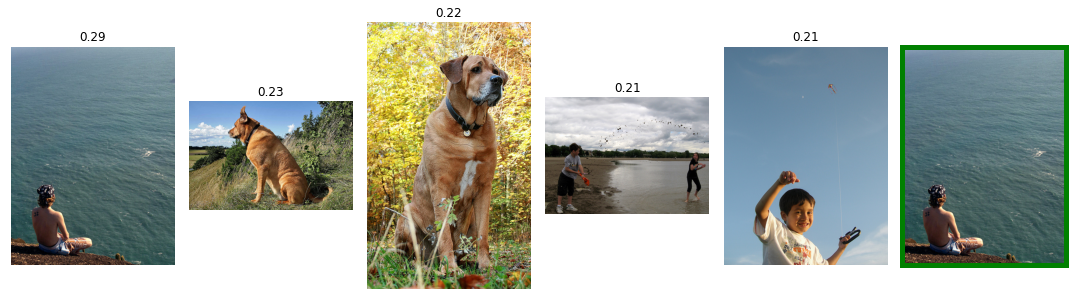

A group of people are in the woods playing instruments .


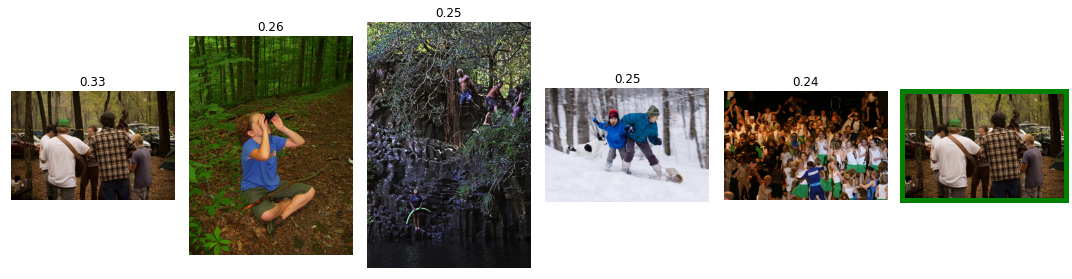

This image is unavailable in your country in compliance with local laws
This image is unavailable in your country in compliance with local laws
Two men kickbox in a ring , one man punching the other .


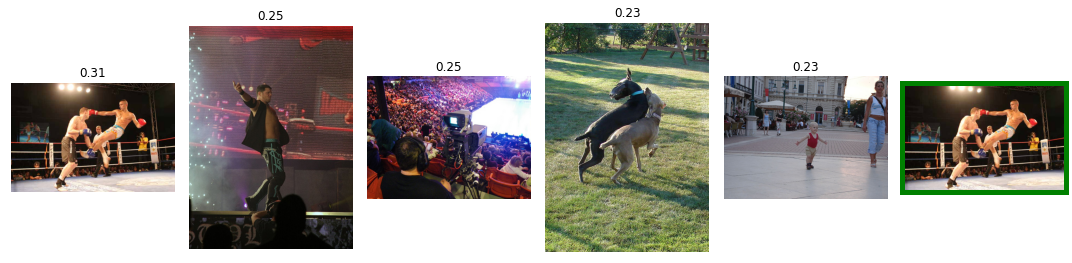

A woman wears a colorful shirt and a lot of jewelry .


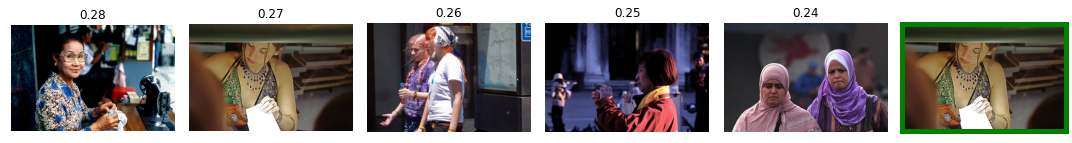

This image is unavailable in your country in compliance with local laws
This image is unavailable in your country in compliance with local laws


In [107]:
samples = test_query.sample(10)
text_test = list(samples['query_text'])
for text in text_test:
    test_ViT(text)

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Да, действительно CLIP работает очень неплохо. Хорошо, что показал его. </div>

**Как мы можем заметить на готовм решении проблем практически нет, и тут более частые попадания в точку и проблемы возникают лишь среди близких по контексту картинок**

## 8. Выводы

- Jupyter Notebook открыт
- Весь код выполняется без ошибок
- Ячейки с кодом расположены в порядке исполнения
- Исследовательский анализ данных выполнен
- Проверены экспертные оценки и краудсорсинговые оценки
- Из датасета исключены те объекты, которые выходят за рамки юридических ограничений
- Изображения векторизованы
- Текстовые запросы векторизованы
- Данные корректно разбиты на тренировочную и тестовую выборки
- Предложена метрика качества работы модели
- Предложена модель схожести изображений и текстового запроса
- Модель обучена
- По итогам обучения модели сделаны выводы
- Проведено тестирование работы модели
- По итогам тестирования визуально сравнили качество поиска

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Заключительный комментарий</b>

Подведем итоги. Я вижу, что в целом с проектом ты справляешься.
    
Проведено исследование и предобработка данных. Выполнена векторизация изображений и текстовых описаний. Обучены модели для предсказания степени соответствия, а также написана функция для инференса и с её помощью проведено тестирование.
 
    
Что нужно доделать обязательно:
    
  - пожалуйста удали лишние установки библиотек и лишние импорты
  - доработать чистку изображений от детских фотографий
  - нужно устранить перемешивание изображений при векторизации
  - прошу отказаться от кросс-валидации и все модели оценивать на валидационной выборке
  - не нужно считать оценки на обучающей выборке
  - на тестировании должна выйти модель, которая будет лучшей на валидационной выборке


Жду твою работу на повторное ревью.
</div>